In [1]:
import scanpy as sc
import portal
import os
import pandas as pd

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
adata_list_name = ['L41344', 'L41345', 'L41346_1', 'L41347', 'L41348', 'L41349']
adata_list_anno = ['tm0','tm7','tm14','tm21','tm30', 'tm60']
adata_all = [sc.read_10x_mtx(os.path.join("/Users/clintli/Downloads/matrices/", name, "filtered_feature_bc_matrix"))
            for name in adata_list_name]
adata_all = portal.utils.filtering(adata_all)

 
    


In [16]:
meta_list = [adata.obs for adata in adata_all]
for meta, anno in zip(meta_list, adata_list_anno):
    meta['treatment_day'] = anno
meta = pd.concat(meta_list)

In [64]:
adata_all[0].var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
Xkr4,ENSMUSG00000051951,Gene Expression,23,False,23,0.001848,99.822873,24.0,False,NaN,0.001848,0.001999,0.952566
Gm37180,ENSMUSG00000103377,Gene Expression,17,False,17,0.001386,99.869080,18.0,False,NaN,0.001386,0.001538,0.993813
Gm37363,ENSMUSG00000104017,Gene Expression,13,False,13,0.001001,99.899884,13.0,False,NaN,0.001001,0.001000,0.912039
Gm38148,ENSMUSG00000103161,Gene Expression,5,False,5,0.000385,99.961494,5.0,False,NaN,0.000385,0.000385,0.970613
Gm19938,ENSMUSG00000102331,Gene Expression,27,False,27,0.002156,99.792068,28.0,False,NaN,0.002156,0.002306,0.933083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd6,ENSMUSG00000064368,Gene Expression,4838,True,4838,0.590836,62.741625,7672.0,False,NaN,0.590836,0.955415,0.935974
mt-Te,ENSMUSG00000064369,Gene Expression,3,True,3,0.000231,99.976896,3.0,False,NaN,0.000231,0.000231,1.001982
mt-Cytb,ENSMUSG00000064370,Gene Expression,12563,True,12563,64.231033,3.249904,834040.0,False,NaN,64.231036,3592.607740,1.012157
mt-Tt,ENSMUSG00000064371,Gene Expression,386,True,386,0.030266,97.027339,393.0,False,NaN,0.030266,0.030430,0.737197


In [3]:
lowdim_list, hvg, mean, std, pca = portal.utils.preprocess_recover_expression(adata_all)
expression_scaled, expression_log_normalized, embed = portal.utils.integrate_recover_expression(lowdim_list, mean, std, pca) 

Filtering dataset 1...
Filtering dataset 2...
Filtering dataset 3...
Filtering dataset 4...
Filtering dataset 5...
Filtering dataset 6...
Finding highly variable genes...


/Users/clintli/Downloads/matrices/Portal/portal/utils.py:118: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  hvg_total = hvg_total & hvg
/Users/clintli/Downloads/matrices/Portal/portal/utils.py:118: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  hvg_total = hvg_total & hvg
/Users/clintli/Downloads/matrices/Portal/portal/utils.py:118: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  hvg_total = hvg_total & hvg
/Users/clintli/Downloads/matrices/Portal/portal/utils.py:118: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logic

Normalizing and scaling...


/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/homebrew/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/homebrew/lib/python3.10/site-packages/anndata/_core/anndata.py:1

Dimensionality reduction via PCA...
Incrementally integrating 6 datasets...
Integrating the 2-th dataset to the 1-st dataset...
Begining time:  Sat Nov 26 21:07:46 2022
step 0, loss_D=11.117566, loss_GAN=2.891140, loss_AE=253.050812, loss_cos=41.724174, loss_LA=201.268692
step 200, loss_D=2.348876, loss_GAN=3.318552, loss_AE=11.858773, loss_cos=5.590295, loss_LA=3.430516
step 400, loss_D=1.841189, loss_GAN=3.424726, loss_AE=6.705581, loss_cos=3.258452, loss_LA=1.798994
step 600, loss_D=1.829095, loss_GAN=3.480606, loss_AE=5.431310, loss_cos=3.074097, loss_LA=1.323139
step 800, loss_D=1.923459, loss_GAN=3.187235, loss_AE=4.632447, loss_cos=2.952731, loss_LA=0.986680
step 1000, loss_D=2.012510, loss_GAN=3.462877, loss_AE=4.464381, loss_cos=2.770052, loss_LA=0.893206
step 1200, loss_D=1.750608, loss_GAN=3.395227, loss_AE=4.438992, loss_cos=2.901534, loss_LA=0.785409
step 1400, loss_D=1.892677, loss_GAN=3.423251, loss_AE=3.974847, loss_cos=2.695811, loss_LA=0.684350
step 1600, loss_D=1.690

In [63]:
std.shape

(1, 1452)

In [42]:
import anndata
adata = anndata.AnnData(X=expression_log_normalized)
adata.obs.index = meta.index
adata.obs = pd.concat([adata.obs, meta], axis=1)
adata.var.index = hvg
adata.var["hvg"]
adata.obsm["latent"] = embed

/var/folders/46/bzxtjv313mnf88dwkwq4qck00000gn/T/ipykernel_88445/1041120487.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X=expression_log_normalized)


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


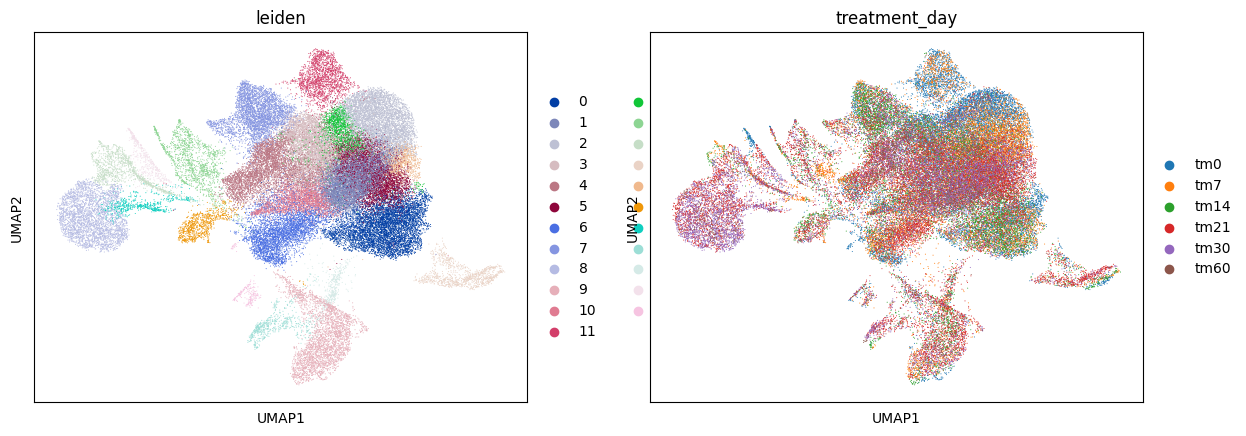

In [56]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep = 'latent')
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden','treatment_day'])

/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_gen

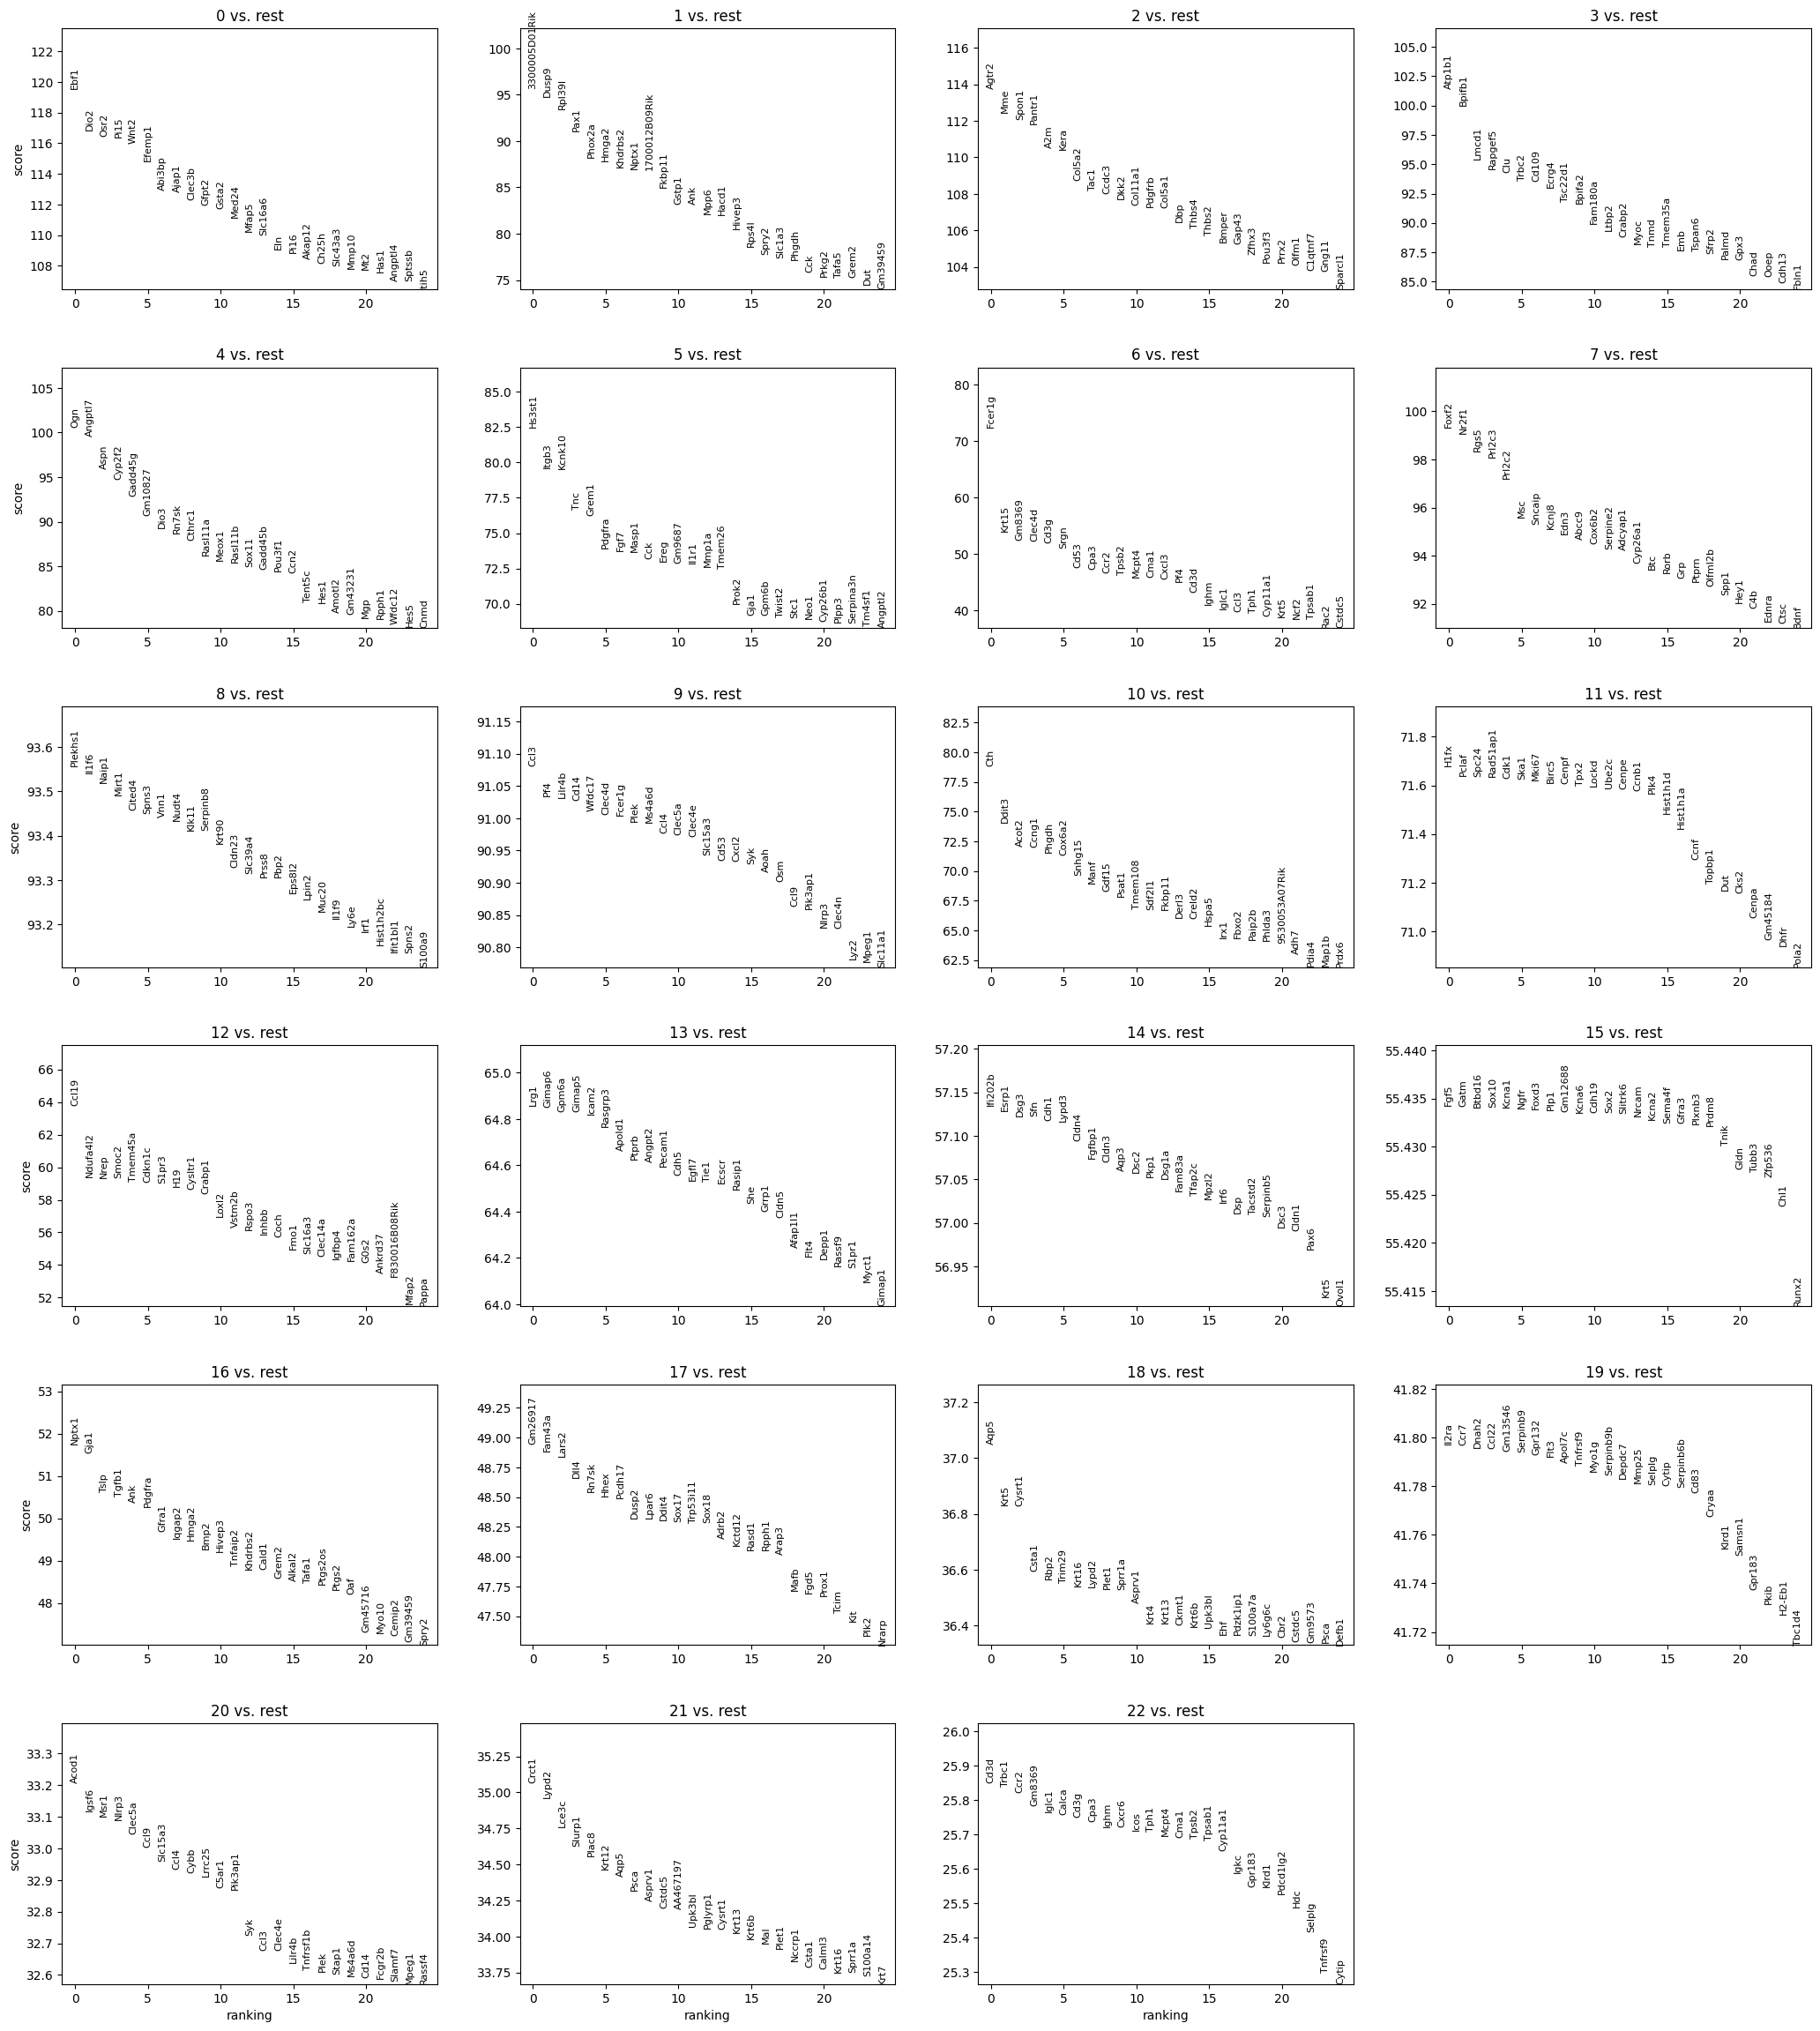

In [66]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/homebrew/lib/python3.10/site-packages/scanpy/tools/_rank_gen

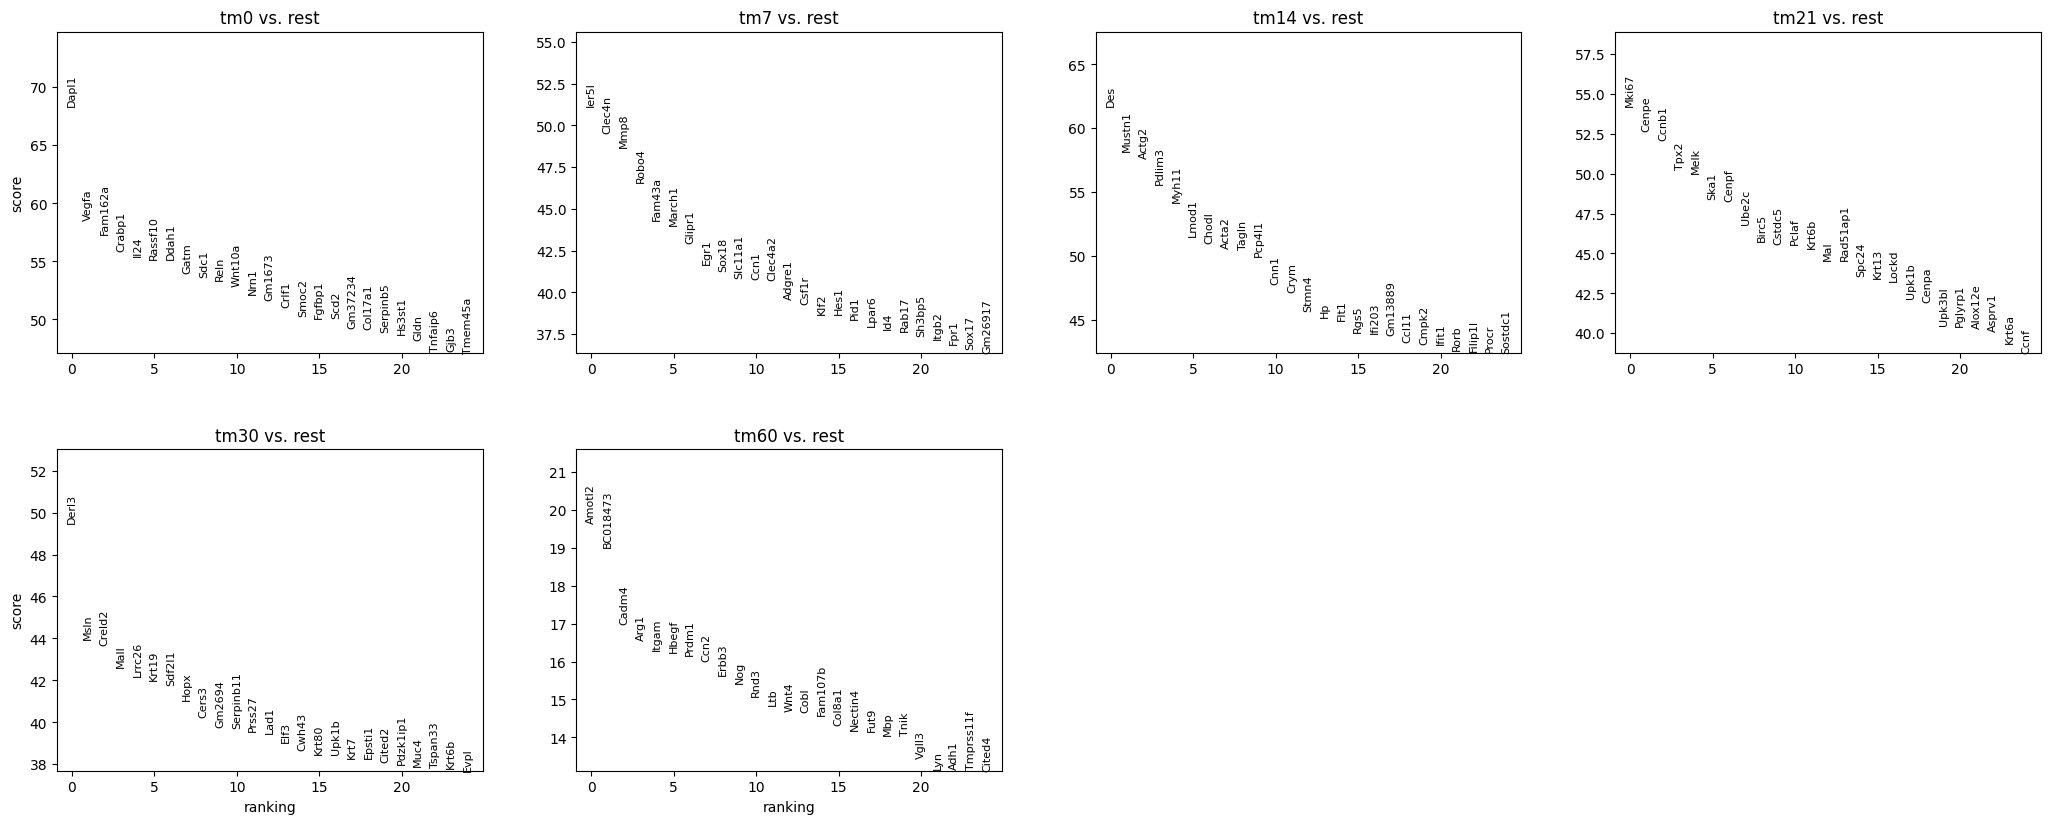

In [70]:
sc.tl.rank_genes_groups(adata, 'treatment_day', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


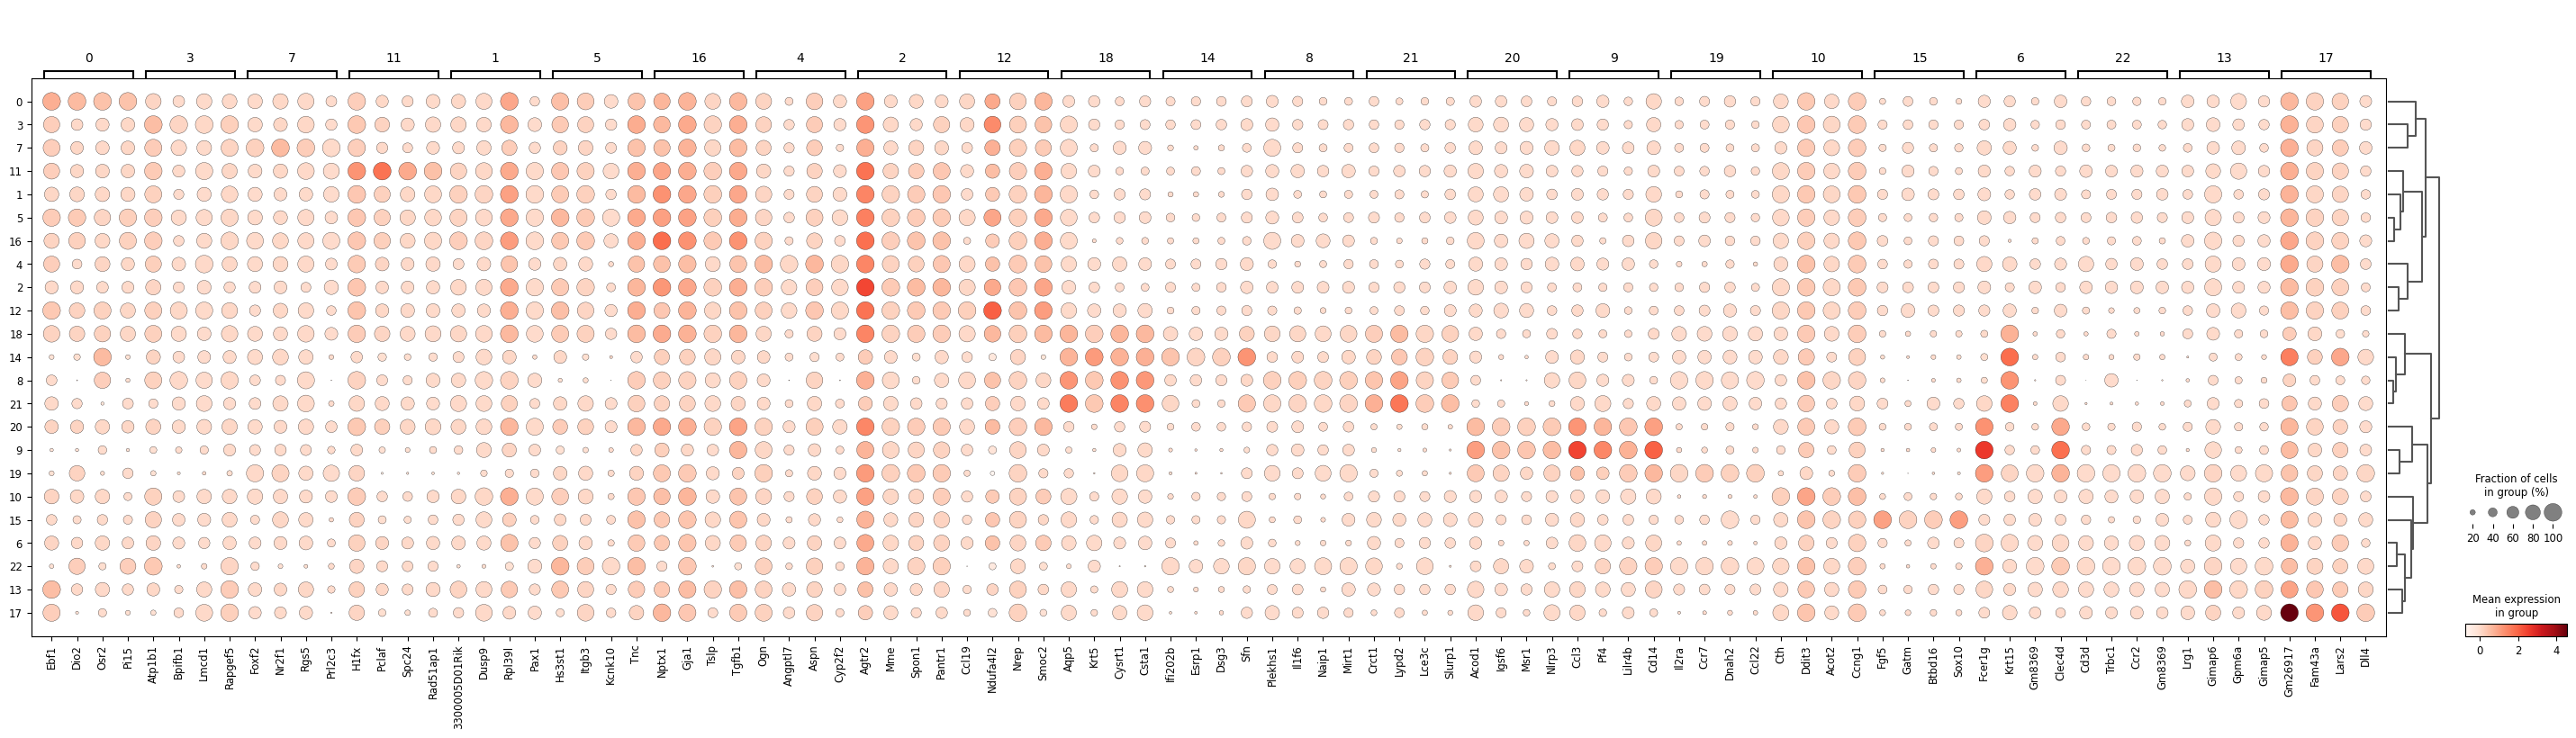

In [67]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4)

/opt/homebrew/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


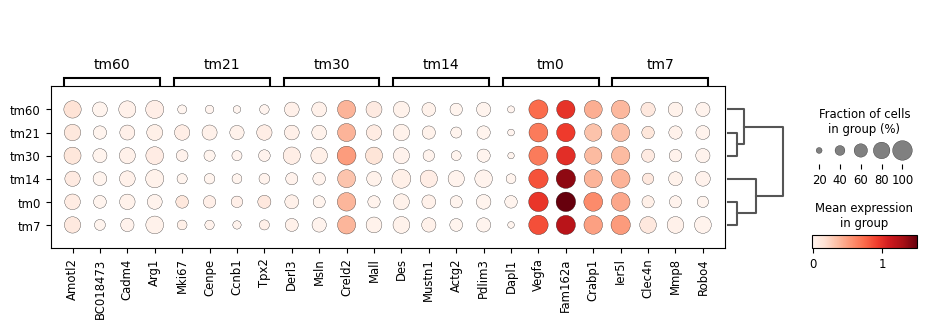

In [71]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4)

In [72]:
sc.tl.draw_graph(adata)

KeyboardInterrupt: 

In [74]:
!pip3 install fa2

  Using cached fa2-0.3.5.tar.gz (435 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.4 MB/s eta 0:00:0031m56.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 62.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      Installing fa2 package (fastest forceatlas2 python implementation)
      
      >>>> Cython is installed?
      Cython is not installed; using pre-generated C files if available
      Please install Cython first and try again if you face any installation problems
      
      >>>> Are pre-generated C files available?
      Yes
      
      >>>> Starting to install!
      
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64

In [78]:
sc.tl.paga(adata, groups='leiden')

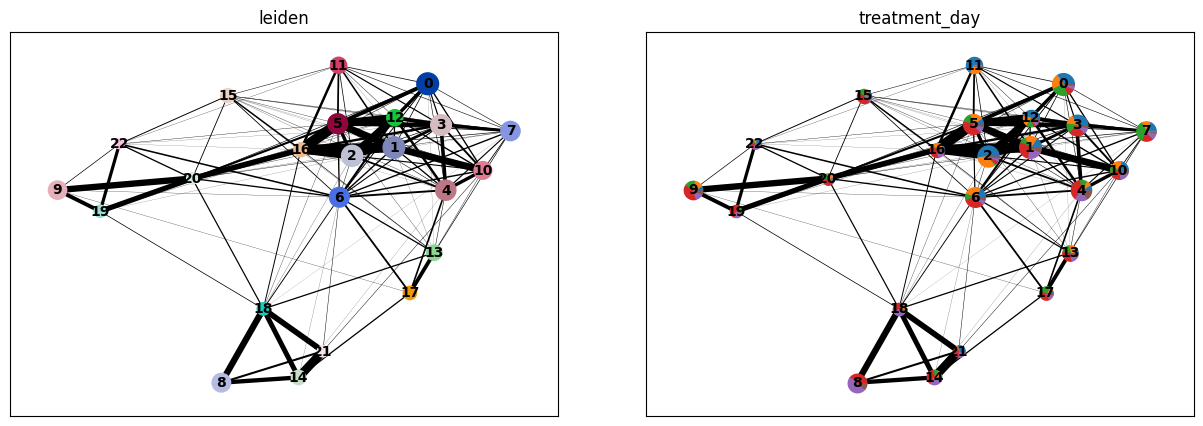

In [81]:
sc.pl.paga(adata, color=['leiden', 'treatment_day'])